In [23]:
! pip install youtube_dl

C:\Users\Ahmed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Clean code for downloading youtube video:

In [24]:
# from pytube import YouTube
# youtube_video_url = input("please enter youtube link: ")
 
# try:
#     yt_obj = YouTube(youtube_video_url)
#     new = yt_obj.streams.all()
#     for i in new: 
#         print(i)
#     filters = yt_obj.streams.filter(progressive=True)
#     for i in filters:
#         print(i)
#     x = input()
    
    
#     if (x  == "yes"):
#         # download the highest quality video
#         filters.get_highest_resolution().download()
#         print('Video Downloaded Successfully')
# except Exception as e:
#     print(e)

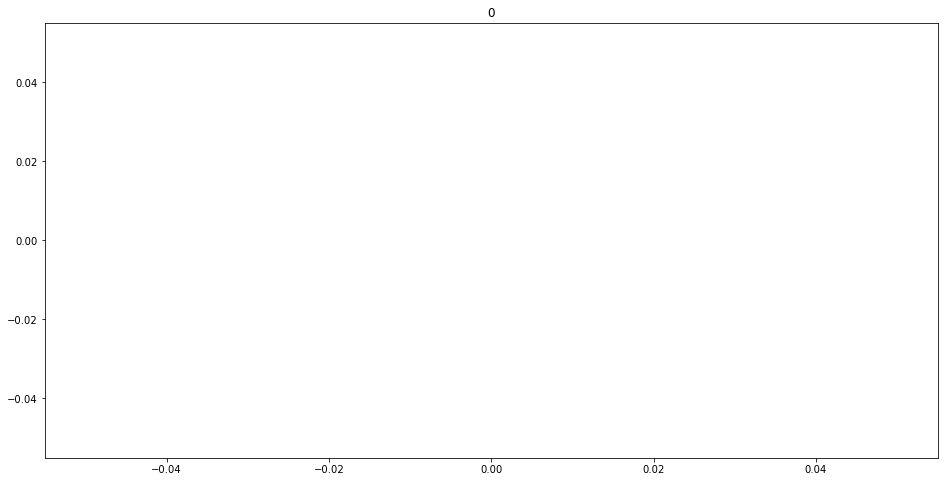

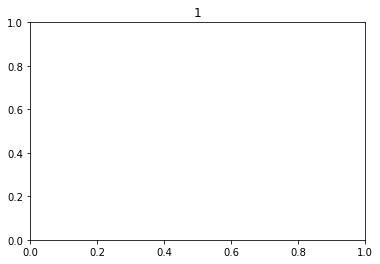

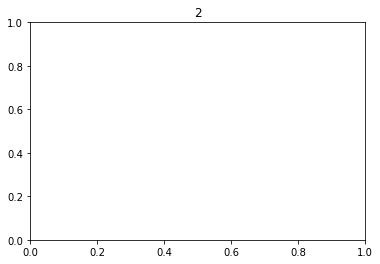

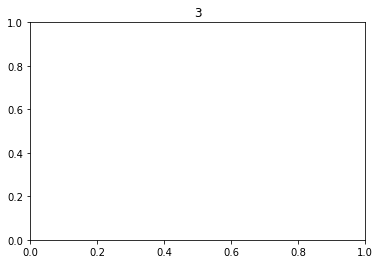

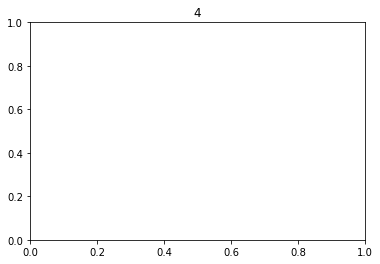

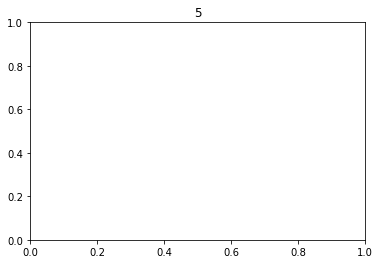

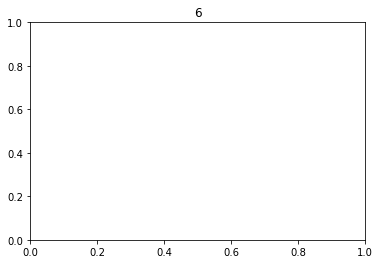

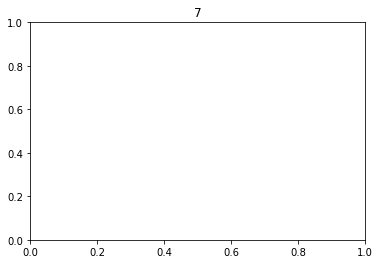

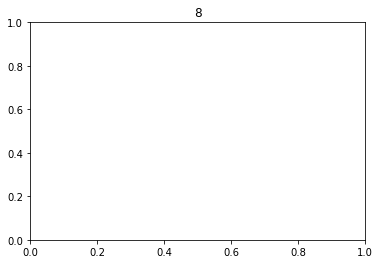

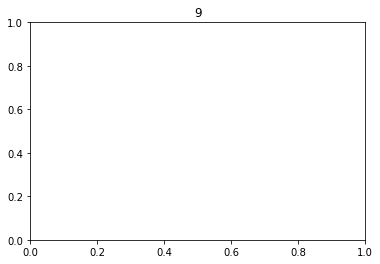

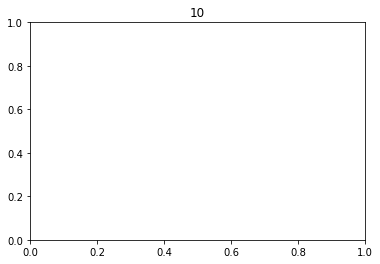

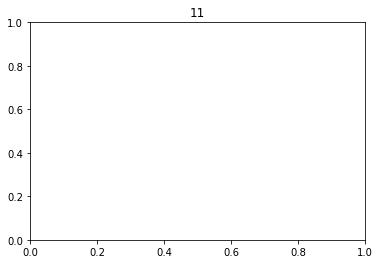

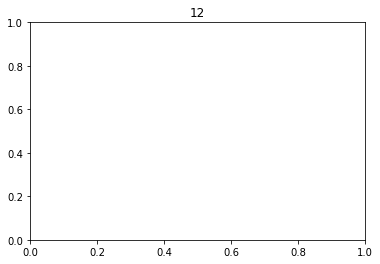

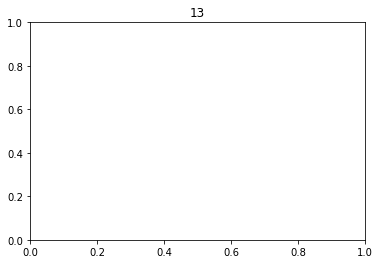

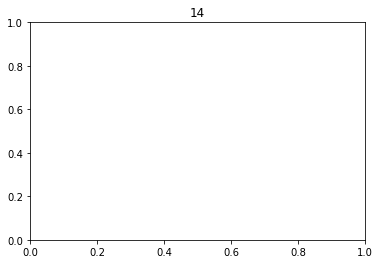

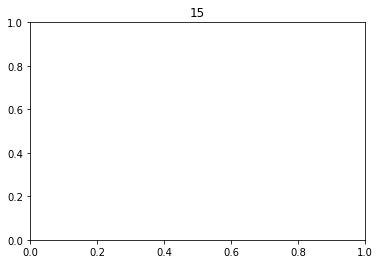

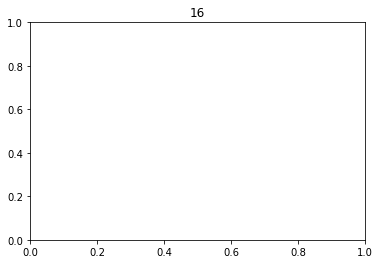

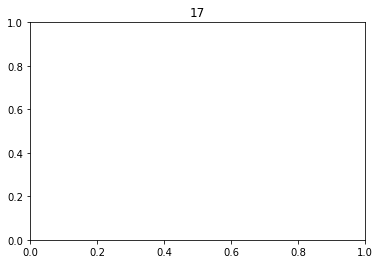

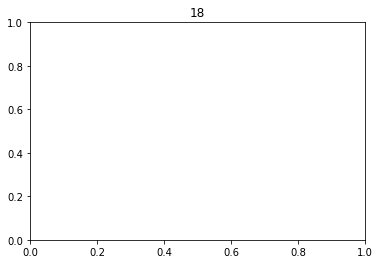

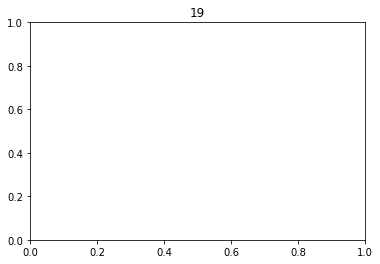

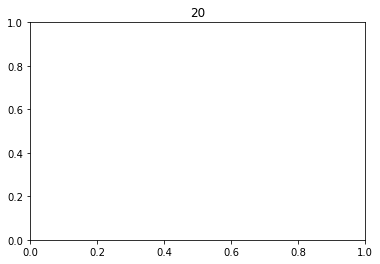

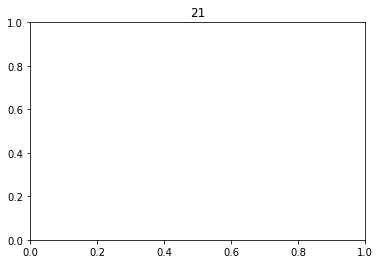

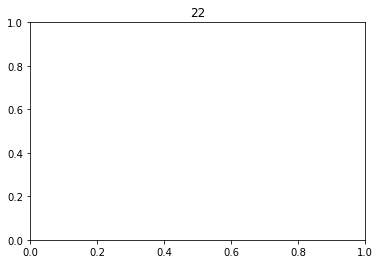

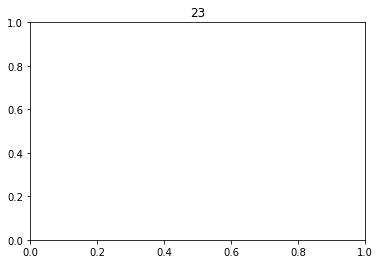

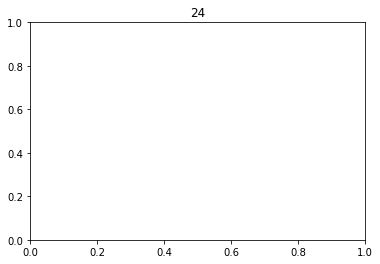

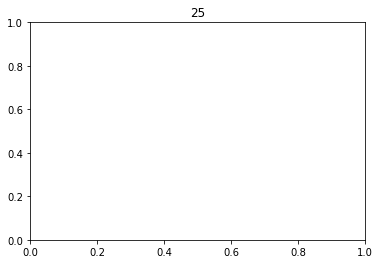

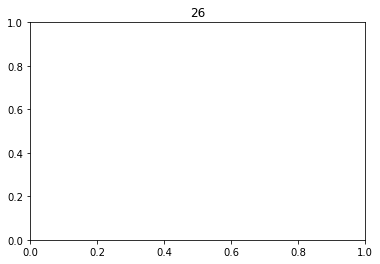

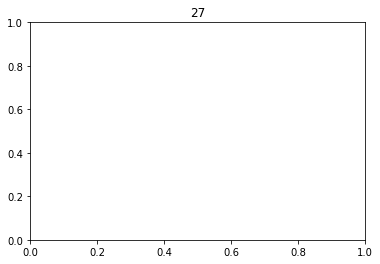

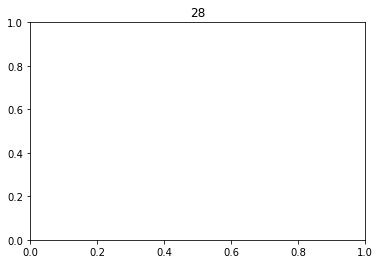

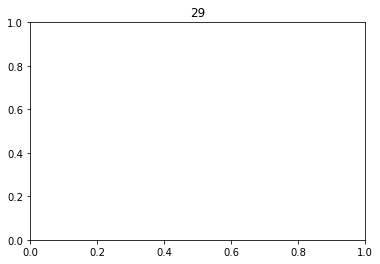

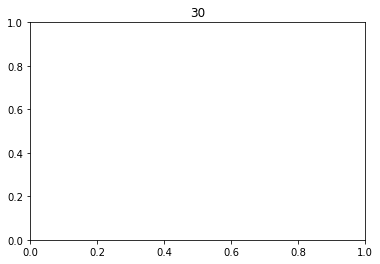

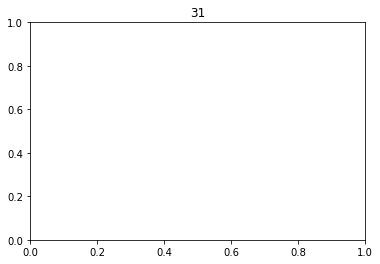

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt

plt.ion()
fig = plt.figure(figsize=(16,8))
axes = fig.add_subplot(111)
data_plot=plt.plot(0,0)
line, = axes.plot([],[])
for i in range(100):
    x = range(i)
    y = range(i)
    line.set_ydata(y)
    line.set_xdata(x)
    if len(y)>0:
        axes.set_ylim(min(y),max(y)+1) # +1 to avoid singular transformation warning
        axes.set_xlim(min(x),max(x)+1)
    plt.title(str(i))
    plt.draw()
    plt.pause(0.1)

plt.show(block=True)

In [4]:
! pip install read_data

ERROR: Could not find a version that satisfies the requirement read_data (from versions: none)
ERROR: No matching distribution found for read_data


In [1]:
import os
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import plot
from read_data import get_data, config


def get_date_button(date):
    label = date.strftime('%d %b')
    date_range = [date, date + timedelta(1)]
    return {'label'    : label,
            'method'   : 'relayout',
            'args'     : [{'xaxis' : {'range' : date_range}}]
            }

def get_records_plot(record, color='rgba( 179, 181, 194, 0.2)'):
    time_step_size = timedelta(seconds=60)
    x = np.arange(record['Start'], record['Finish'] + time_step_size,
                    time_step_size)
    y = [15]*x.shape[0]
    record_plot = go.Scatter(
            x=pd.Series(x),
            y=y,
            fill='tozeroy',
            mode='none',
            fillcolor=color,
            text=[record['Event_details']]*x.shape[0],
            hoverinfo='text',
            showlegend=False
    )
    return record_plot


user = 'Cher Wee'
start_date = config[user]['start_date'] + timedelta(seconds=60*60*8)
records, cgm_data = get_data(user)

cgm_plot = go.Scatter(
        x=cgm_data['Time'],
        y=cgm_data['Glucose (mmol/L)'],
        name='Glucose (mmol/L)',
        hoverinfo='y',
        line={'color': '#1f77b4'},
        showlegend=False
    )

plot_data = [cgm_plot]

record_plot_colors = {'Sleep'    : 'rgba( 179, 181, 194, 0.2)',
                      'Meal'     : 'rgba( 85, 168, 104, 0.3)',
                      'Activity' : 'rgba( 129, 114, 178, 0.2)'
                     }
for n, row in records.iterrows():
    color = record_plot_colors[row['Event_type']]
    plot_data.append(get_records_plot(row, color=color))


buttons = [get_date_button(start_date + timedelta(days))
                                    for days in range(13)]
updatemenus=[{ 'buttons' : buttons }]

layout = go.Layout(
    xaxis={'range': [start_date, start_date + timedelta(1)]},
    yaxis={'range': [2, 14],
           'title' : 'Glucose (mmol/L)',
           'hoverformat' : '.1f'
          },
    plot_bgcolor='rgba(0,0,0,0)',
    updatemenus=updatemenus,
    hoverdistance=1
)

fig = go.Figure(
        data=plot_data,
        layout=layout
    )

if not os.path.exists('html'):
        os.mkdir('html')
plot(fig, show_link=False,filename=os.path.join('html', 'full_data_{}.html'.format(user)))

FileNotFoundError: [Errno 2] No such file or directory: 'data\\raw\\records_cherwee.csv'

Text(0.5, 1.0, 'Concise Date Formatter')

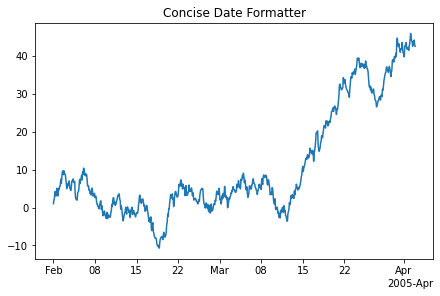

In [3]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

base = datetime.datetime(2005, 2, 1)
dates = np.array([base + datetime.timedelta(hours=(2 * i))
                  for i in range(732)])
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, ax = plt.subplots(constrained_layout=True)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot(dates, y)
ax.set_title('Concise Date Formatter')